<a href="https://colab.research.google.com/github/niharika-naidu4/Deep-Learning/blob/main/Cyberbully_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import os
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

from sklearn import metrics as metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

nltk.download(['punkt', 'wordnet'])

import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('punkt_tab') # Download the missing 'punkt_tab' data

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [13]:
df = pd.read_json('/content/Dataset for Detection of Cyber-Trolls.json', lines= True)
df.head()

,content,annotation,extras
0,Get fucking real dude.,"{'notes': '', 'label': ['1']}",NaN
1,She is as dirty as they come and that crook ...,"{'notes': '', 'label': ['1']}",NaN
2,why did you fuck it up. I could do it all day...,"{'notes': '', 'label': ['1']}",NaN
3,Dude they dont finish enclosing the fucking s...,"{'notes': '', 'label': ['1']}",NaN
4,WTF are you talking about Men? No men thats n...,"{'notes': '', 'label': ['1']}",NaN


In [14]:
df.shape

(20001, 3)

In [15]:
df['label'] = df['annotation'].apply(lambda x: x.get('label'))
df['label'] = df.label.apply(lambda x: int(x[0]))

df.head()

,content,annotation,extras,label
0,Get fucking real dude.,"{'notes': '', 'label': ['1']}",NaN,1
1,She is as dirty as they come and that crook ...,"{'notes': '', 'label': ['1']}",NaN,1
2,why did you fuck it up. I could do it all day...,"{'notes': '', 'label': ['1']}",NaN,1
3,Dude they dont finish enclosing the fucking s...,"{'notes': '', 'label': ['1']}",NaN,1
4,WTF are you talking about Men? No men thats n...,"{'notes': '', 'label': ['1']}",NaN,1


In [16]:
df['extras'].unique()

array([nan])

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20001 entries, 0 to 20000
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   content     20001 non-null  object 
 1   annotation  20001 non-null  object 
 2   extras      0 non-null      float64
 3   label       20001 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 625.2+ KB


In [18]:
df = df.drop(['annotation', 'extras'], axis=1)

In [19]:
def load_data(path):
    df = pd.read_json(path, lines= True)

    df["label"] = df.annotation.apply(lambda x: x.get('label'))
    df["label"] = df.label.apply(lambda x: x[0])

    X = df.content.values
    y = df.label.values

    return X, y

In [20]:
def tokenize(text):

    tokens = word_tokenize(text)
    lemmatizer = WordNetLemmatizer()

    clean_tokens = []
    for tok in tokens:
        clean_tok = lemmatizer.lemmatize(tok).lower().strip()
        clean_tokens.append(clean_tok)

    return clean_tokens

## Random Forest Classifier

In [21]:
url = '/content/Dataset for Detection of Cyber-Trolls.json'

X, y = load_data(url)

X_train, X_test, y_train, y_test = train_test_split(X, y)

vect = CountVectorizer(tokenizer=tokenize)
tfidf = TfidfTransformer()
RandomForestModel = RandomForestClassifier()

# train classifier
X_train_counts = vect.fit_transform(X_train)
X_train_tfidf = tfidf.fit_transform(X_train_counts)
RandomForestModel.fit(X_train_tfidf, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


RandomForestClassifier()

In [22]:
# Transform the test data using the same vectorizer and TF-IDF transformer
X_test_counts = vect.transform(X_test)
X_test_tfidf = tfidf.transform(X_test_counts)

# Predict using the Random Forest Classifier
y_pred = RandomForestModel.predict(X_test_tfidf)

<Axes: >

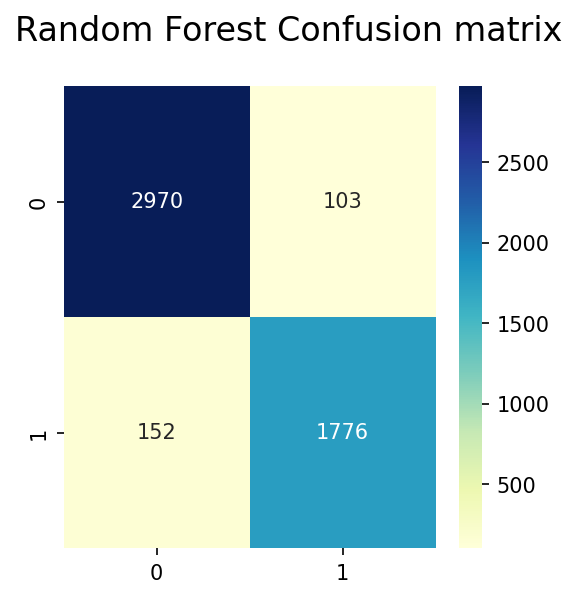

In [23]:
# Plot the confusion matrix
plt.figure(figsize=(4, 4), dpi=150)
plt.suptitle('Random Forest Confusion matrix', size=16, y=1.00);
con = confusion_matrix(y_test.tolist(), y_pred.tolist())
sns.heatmap(con, cmap='YlGnBu', annot=True, fmt = 'd')

In [24]:
print("Accuracy Score ---> ", accuracy_score(y_test, y_pred))
print("Precision Score --> ", precision_score(y_test, y_pred, average="binary", pos_label='1'))
print("Recall Score -----> ", recall_score(y_test, y_pred, average="binary", pos_label='1'))
print("F1 Score ---------> ", f1_score(y_test, y_pred, average="binary", pos_label='1'))

Accuracy Score --->  0.9490101979604079
Precision Score -->  0.9451836083022884
Recall Score ----->  0.921161825726141
F1 Score --------->  0.9330181245074862


## Logistic Regression

In [25]:
X_train_counts = vect.fit_transform(X_train)
X_train_tfidf = tfidf.fit_transform(X_train_counts)
LogitRegressionModel = LogisticRegression()
LogitRegressionModel.fit(X_train_tfidf, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


LogisticRegression()

In [26]:
X_test_counts = vect.transform(X_test)
X_test_tfidf = tfidf.transform(X_test_counts)
y_pred = LogitRegressionModel.predict(X_test_tfidf)

<Axes: >

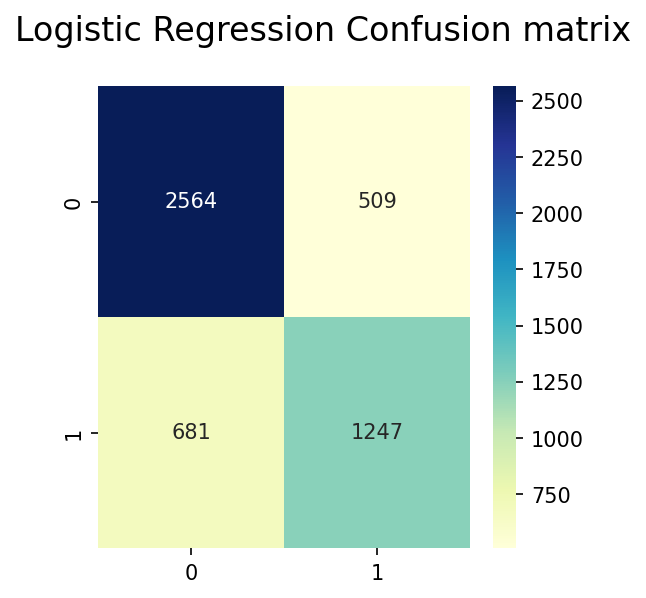

In [27]:
plt.figure(figsize=(4, 4), dpi=150)
plt.suptitle('Logistic Regression Confusion matrix', size=16, y=1.00);
con = confusion_matrix(y_test.tolist(), y_pred.tolist())
sns.heatmap(con, cmap='YlGnBu', annot=True, fmt = 'd')

In [28]:
print("Accuracy Score ---> ", accuracy_score(y_test, y_pred))
print("Precision Score --> ", precision_score(y_test, y_pred, average="binary", pos_label='1'))
print("Recall Score -----> ", recall_score(y_test, y_pred, average="binary", pos_label='1'))
print("F1 Score ---------> ", f1_score(y_test, y_pred, average="binary", pos_label='1'))

Accuracy Score --->  0.7620475904819036
Precision Score -->  0.7101366742596811
Recall Score ----->  0.6467842323651453
F1 Score --------->  0.6769815418023887


##K Nearest Neighbour

In [29]:
from sklearn.neighbors import KNeighborsClassifier

k_neighbors = 5
KNNModel = KNeighborsClassifier(n_neighbors=k_neighbors)

X_train_counts = vect.fit_transform(X_train)
X_train_tfidf = tfidf.fit_transform(X_train_counts)
KNNModel.fit(X_train_tfidf, y_train)


/usr/local/lib/python3.11/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


KNeighborsClassifier()

In [30]:
X_test_counts = vect.transform(X_test)
X_test_tfidf = tfidf.transform(X_test_counts)

y_pred = KNNModel.predict(X_test_tfidf)

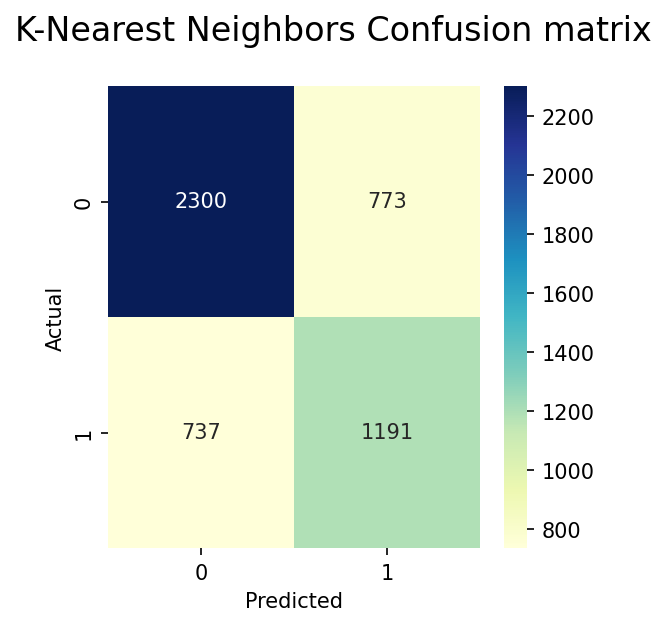

In [31]:
confusion = confusion_matrix(y_test.tolist(), y_pred.tolist())

plt.figure(figsize=(4, 4), dpi=150)
plt.suptitle('K-Nearest Neighbors Confusion matrix', size=16, y=1.00)
sns.heatmap(confusion, cmap='YlGnBu', annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [32]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Score ---> ", accuracy)
precision = precision_score(y_test, y_pred, average="binary", pos_label='1')
print("Precision Score --> ", precision)
recall = recall_score(y_test, y_pred, average="binary", pos_label='1')
print("Recall Score -----> ", recall)
f1 = f1_score(y_test, y_pred, average="binary", pos_label='1')
print("F1 Score ---------> ", f1)


Accuracy Score --->  0.6980603879224155
Precision Score -->  0.6064154786150713
Recall Score ----->  0.6177385892116183
F1 Score --------->  0.6120246659815005
